In [3]:
import xml.etree.ElementTree as ET
tree = ET.parse('Geant.xml')
root = tree.getroot()
print(root.tag)

network


In [4]:
nodes = root.find("networkStructure/nodes")
nodes=[]
links=[]

In [5]:
nodes = root.find('networkStructure/nodes')

for node in nodes.findall('node'):
    node_id = node.get('id')
    coordinates = node.find('coordinates')

    if coordinates is not None:
        x = coordinates.find('x').text
        y = coordinates.find('y').text
        print(f"Node ID: {node_id}, Coordinates: ({x}, {y})")


Node ID: at1.at, Coordinates: (16.3729, 48.2091)
Node ID: be1.be, Coordinates: (4.3518, 50.8469)
Node ID: ch1.ch, Coordinates: (6.1399, 46.2038)
Node ID: cz1.cz, Coordinates: (14.4423, 50.0785)
Node ID: de1.de, Coordinates: (8.6842, 50.1122)
Node ID: es1.es, Coordinates: (-3.7033, 40.4167)
Node ID: fr1.fr, Coordinates: (2.351, 48.8566)
Node ID: gr1.gr, Coordinates: (23.5808, 37.9778)
Node ID: hr1.hr, Coordinates: (15.9644, 45.8071)
Node ID: hu1.hu, Coordinates: (19.0936, 47.4976)
Node ID: ie1.ie, Coordinates: (-6.2573, 53.3416)
Node ID: il1.il, Coordinates: (34.8097, 32.0714)
Node ID: it1.it, Coordinates: (9.19, 45.4642)
Node ID: lu1.lu, Coordinates: (6.1296, 49.6112)
Node ID: nl1.nl, Coordinates: (4.9407, 52.3236)
Node ID: ny1.ny, Coordinates: (-73.94384, 40.6698)
Node ID: pl1.pl, Coordinates: (16.8874, 52.3963)
Node ID: pt1.pt, Coordinates: (-9.1363, 38.7073)
Node ID: se1.se, Coordinates: (17.8742, 59.3617)
Node ID: si1.si, Coordinates: (14.5148, 46.0574)
Node ID: sk1.sk, Coordinates

In [6]:
links = root.find('networkStructure/links')
if links is not None:
    for link in links.findall('link'):
        link_id = link.get('id')
        
        source_elem = link.find('source')
        source = source_elem.text if source_elem is not None else None
        
        target_elem = link.find('target')
        target = target_elem.text if target_elem is not None else None
        
        pre_installed_module = link.find('preInstalledModule')
        if pre_installed_module is not None:
            capacity_elem = pre_installed_module.find('capacity')
            capacity = capacity_elem.text if capacity_elem is not None else None
            
            cost_elem = pre_installed_module.find('cost')
            cost = cost_elem.text if cost_elem is not None else None
            
            print(f"Link ID: {link_id}, Source: {source}, Target: {target}, Capacity: {capacity}, Cost: {cost}")

In [7]:
gml_output = "graph [\n"
id_count = 0
eid_count = 0
nodes_list = []

# Extract nodes information
nodes = root.find('networkStructure/nodes')
for node in nodes.findall('node'):
    node_id = node.get('id')
    nodes_list.append(node_id)
    
    coordinates = node.find('coordinates')
    if coordinates is not None:
        x = coordinates.find('x').text
        y = coordinates.find('y').text
    else:
        x = '0'  # Default value if coordinates are missing
        y = '0'  # Default value if coordinates are missing
    
    # Append node information to GML output
    gml_output += '  node [\n'
    gml_output += f'    id {id_count}\n'
    gml_output += f'    label "{node_id}"\n'
    gml_output += f'    country "US"\n'
    gml_output += f'    Longitude {x}\n'
    gml_output += f'    Latitude {y}\n'
    gml_output += '  ]\n'
    
    id_count += 1

# Extract links information
links = root.find('networkStructure/links')
if links is not None:
    for link in links.findall('link'):
        link_id = link.get('id')
        
        source_elem = link.find('source')
        target_elem = link.find('target')
        
        if source_elem is not None and target_elem is not None:
            source_id = source_elem.text
            target_id = target_elem.text
            
            if source_id in nodes_list and target_id in nodes_list:
                source = nodes_list.index(source_id)
                target = nodes_list.index(target_id)
            else:
                continue  
            
            capacity_elem = link.find('preInstalledModule/capacity')
            cost_elem = link.find('preInstalledModule/cost')
            
            if capacity_elem is not None:
                capacity = capacity_elem.text
            else:
                capacity = '0' 
            
            if cost_elem is not None:
                cost = cost_elem.text
            else:
                cost = '0'  
            
            gml_output += '  edge [\n'
            gml_output += f'    id {eid_count}\n'
            gml_output += f'    link_label "{link_id}"\n'
            gml_output += f'    source {source}\n'
            gml_output += f'    target {target}\n'
            gml_output += f'    capacity {capacity}\n'
            gml_output += f'    cost {cost}\n'
            gml_output += '  ]\n'
            
            eid_count += 1
else:
    print("No links found in the XML structure.")

gml_output += "]"

output_file = 'Geant.gml'
with open(output_file, 'w') as f:
    f.write(gml_output)

print(f"GML file '{output_file}' has been created successfully.")

GML file 'Geant.gml' has been created successfully.


In [20]:
import networkx as nx
G= nx.read_gml("Geant.gml")
print(G.nodes(data=True))

[('at1.at', {'country': 'US', 'Longitude': 16.3729, 'Latitude': 48.2091}), ('be1.be', {'country': 'US', 'Longitude': 4.3518, 'Latitude': 50.8469}), ('ch1.ch', {'country': 'US', 'Longitude': 6.1399, 'Latitude': 46.2038}), ('cz1.cz', {'country': 'US', 'Longitude': 14.4423, 'Latitude': 50.0785}), ('de1.de', {'country': 'US', 'Longitude': 8.6842, 'Latitude': 50.1122}), ('es1.es', {'country': 'US', 'Longitude': -3.7033, 'Latitude': 40.4167}), ('fr1.fr', {'country': 'US', 'Longitude': 2.351, 'Latitude': 48.8566}), ('gr1.gr', {'country': 'US', 'Longitude': 23.5808, 'Latitude': 37.9778}), ('hr1.hr', {'country': 'US', 'Longitude': 15.9644, 'Latitude': 45.8071}), ('hu1.hu', {'country': 'US', 'Longitude': 19.0936, 'Latitude': 47.4976}), ('ie1.ie', {'country': 'US', 'Longitude': -6.2573, 'Latitude': 53.3416}), ('il1.il', {'country': 'US', 'Longitude': 34.8097, 'Latitude': 32.0714}), ('it1.it', {'country': 'US', 'Longitude': 9.19, 'Latitude': 45.4642}), ('lu1.lu', {'country': 'US', 'Longitude': 6.1

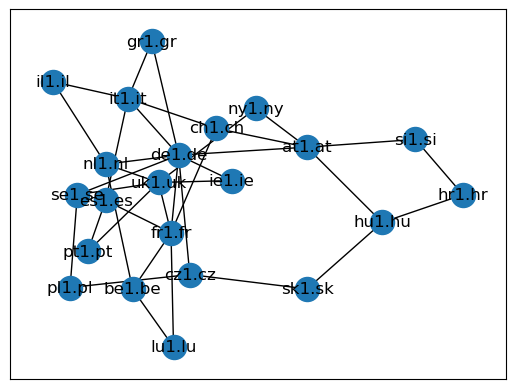

In [21]:
import matplotlib.pyplot as plt
pos = nx.spring_layout(G,seed=3113794652)
nx.draw_networkx(G,pos,with_labels=True)

In [22]:
import math 

In [23]:
def harvesine(origin, destination):
        print(origin)
        print(destination)
        lat1, lon1 = origin
        lat2, lon2 = destination
        radius = 6371000
        dlat = math.radians(lat2-lat1)
        dlon = math.radians(lon2-lon1)
        a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
        d = radius * c

        return d

In [24]:
def add_latency_info(G):
    ## initialize latency in graph G

    for i in G.edges:
            
            orig,dest = i
            #print(G.nodes[orig]['Latitude'])
            
            dist = harvesine([G.nodes[orig]['Latitude'],G.nodes[orig]['Longitude']],[G.nodes[dest]['Latitude'],G.nodes[dest]['Longitude']])
            latency = dist/(2*10**8)
            latency = latency * 1000   # scale factor just to show better in the graph
            latency = round(latency,2)
            G.edges[i]['weight'] = latency

In [25]:
add_latency_info(G)

[48.2091, 16.3729]
[46.2038, 6.1399]
[48.2091, 16.3729]
[50.1122, 8.6842]
[48.2091, 16.3729]
[47.4976, 19.0936]
[48.2091, 16.3729]
[40.6698, -73.94384]
[48.2091, 16.3729]
[46.0574, 14.5148]
[50.8469, 4.3518]
[48.8566, 2.351]
[50.8469, 4.3518]
[49.6112, 6.1296]
[50.8469, 4.3518]
[52.3236, 4.9407]
[46.2038, 6.1399]
[48.8566, 2.351]
[46.2038, 6.1399]
[45.4642, 9.19]
[50.0785, 14.4423]
[50.1122, 8.6842]
[50.0785, 14.4423]
[52.3963, 16.8874]
[50.0785, 14.4423]
[48.1531, 17.1297]
[50.1122, 8.6842]
[48.8566, 2.351]
[50.1122, 8.6842]
[37.9778, 23.5808]
[50.1122, 8.6842]
[53.3416, -6.2573]
[50.1122, 8.6842]
[45.4642, 9.19]
[50.1122, 8.6842]
[52.3236, 4.9407]
[50.1122, 8.6842]
[59.3617, 17.8742]
[40.4167, -3.7033]
[48.8566, 2.351]
[40.4167, -3.7033]
[45.4642, 9.19]
[40.4167, -3.7033]
[38.7073, -9.1363]
[48.8566, 2.351]
[49.6112, 6.1296]
[48.8566, 2.351]
[51.5086, -0.1264]
[37.9778, 23.5808]
[45.4642, 9.19]
[45.8071, 15.9644]
[47.4976, 19.0936]
[45.8071, 15.9644]
[46.0574, 14.5148]
[47.4976, 19.0

In [8]:
npmatrix=[]
for i in G.nodes:
    eachrow=[]
    for j in G.nodes:
        eachrow.append(nx.dijkstra_path_length(G,i,j))
    npmatrix.append(eachrow)
print(npmatrix)

[[0, 5.63, 4.02, 3.3600000000000003, 2.99, 10.64, 5.380000000000001, 11.950000000000001, 1.9699999999999998, 1.09, 8.43, 18.549999999999997, 5.27, 6.56, 4.78, 33.98, 4.9, 13.15, 8.780000000000001, 1.39, 1.9100000000000001, 6.58], [5.630000000000001, 0, 3.37, 4.6899999999999995, 2.64, 6.58, 1.32, 11.600000000000001, 7.6000000000000005, 6.720000000000001, 4.96, 17.310000000000002, 4.62, 0.93, 0.85, 30.5, 6.2299999999999995, 9.09, 8.56, 7.0200000000000005, 6.14, 2.65], [4.02, 3.37, 0, 5.89, 3.84, 7.19, 2.05, 8.51, 5.989999999999999, 5.109999999999999, 6.08, 14.53, 1.25, 3.4799999999999995, 4.22, 31.62, 7.43, 9.7, 9.76, 5.409999999999999, 5.93, 3.7699999999999996], [3.3600000000000003, 4.6899999999999995, 5.89, 0, 2.05, 9.7, 4.4399999999999995, 11.010000000000002, 3.79, 2.27, 7.49, 17.919999999999998, 4.64, 5.619999999999999, 3.84, 33.49, 1.54, 12.209999999999999, 5.42, 4.37, 1.45, 5.64], [2.99, 2.64, 3.84, 2.05, 0, 7.65, 2.39, 8.96, 4.96, 4.08, 5.44, 15.87, 2.59, 3.5700000000000003, 1.79,

In [26]:
import numpy as np
latency_matrix = np.array([[0, 5.63, 4.02, 3.3600000000000003, 2.99, 10.64, 5.380000000000001, 11.950000000000001, 1.9699999999999998, 1.09, 8.43, 18.549999999999997, 5.27, 6.56, 4.78, 33.98, 4.9, 13.15, 8.780000000000001, 1.39, 1.9100000000000001, 6.58], [5.630000000000001, 0, 3.37, 4.6899999999999995, 2.64, 6.58, 1.32, 11.600000000000001, 7.6000000000000005, 6.720000000000001, 4.96, 17.310000000000002, 4.62, 0.93, 0.85, 30.5, 6.2299999999999995, 9.09, 8.56, 7.0200000000000005, 6.14, 2.65], [4.02, 3.37, 0, 5.89, 3.84, 7.19, 2.05, 8.51, 5.989999999999999, 5.109999999999999, 6.08, 14.53, 1.25, 3.4799999999999995, 4.22, 31.62, 7.43, 9.7, 9.76, 5.409999999999999, 5.93, 3.7699999999999996], [3.3600000000000003, 4.6899999999999995, 5.89, 0, 2.05, 9.7, 4.4399999999999995, 11.010000000000002, 3.79, 2.27, 7.49, 17.919999999999998, 4.64, 5.619999999999999, 3.84, 33.49, 1.54, 12.209999999999999, 5.42, 4.37, 1.45, 5.64], [2.99, 2.64, 3.84, 2.05, 0, 7.65, 2.39, 8.96, 4.96, 4.08, 5.44, 15.87, 2.59, 3.5700000000000003, 1.79, 31.44, 3.59, 10.16, 5.92, 4.38, 3.5, 3.59], [10.64, 6.58, 7.19, 9.7, 7.65, 0, 5.26, 13.2, 12.610000000000001, 11.73, 9.29, 19.22, 5.94, 6.6899999999999995, 7.43, 34.83, 11.239999999999998, 2.51, 13.57, 12.030000000000001, 11.149999999999999, 6.9799999999999995], [5.380000000000001, 1.32, 2.05, 4.4399999999999995, 2.39, 5.26, 0, 10.559999999999999, 7.3500000000000005, 6.470000000000001, 4.03, 16.58, 3.3, 1.43, 2.17, 29.57, 5.9799999999999995, 7.77, 8.31, 6.7700000000000005, 5.89, 1.72], [11.950000000000001, 11.6, 8.51, 11.010000000000002, 8.96, 13.2, 10.559999999999999, 0, 13.920000000000002, 13.040000000000001, 14.400000000000002, 20.54, 7.26, 11.989999999999998, 10.75, 40.13, 12.55, 15.709999999999999, 14.88, 13.340000000000002, 12.46, 12.28], [1.9699999999999998, 7.6, 5.989999999999999, 3.79, 4.96, 12.61, 7.35, 13.920000000000002, 0, 1.52, 10.4, 20.52, 7.239999999999999, 8.53, 6.75, 35.949999999999996, 5.33, 15.12, 9.21, 0.58, 2.34, 8.55], [1.09, 6.72, 5.109999999999999, 2.27, 4.08, 11.73, 6.470000000000001, 13.040000000000001, 1.52, 0, 9.52, 19.64, 6.359999999999999, 7.6499999999999995, 5.87, 35.07, 3.81, 14.24, 7.6899999999999995, 2.1, 0.82, 7.67], [8.43, 4.96, 6.08, 7.49, 5.44, 9.29, 4.03, 14.400000000000002, 10.4, 9.52, 0, 20.57, 7.33, 5.46, 4.11, 30.16, 9.030000000000001, 10.24, 9.43, 9.82, 8.94, 2.31], [18.549999999999997, 17.310000000000002, 14.53, 17.919999999999998, 15.87, 19.22, 16.58, 20.54, 20.519999999999996, 19.639999999999997, 20.57, 0, 13.28, 18.009999999999998, 16.46, 46.11, 19.459999999999997, 21.729999999999997, 21.79, 19.939999999999998, 19.369999999999997, 18.26], [5.27, 4.62, 1.25, 4.64, 2.59, 5.94, 3.3, 7.26, 7.239999999999999, 6.359999999999999, 7.33, 13.28, 0, 4.7299999999999995, 4.38, 32.870000000000005, 6.18, 8.45, 8.51, 6.659999999999999, 6.09, 5.02], [6.5600000000000005, 0.93, 3.4799999999999995, 5.62, 3.5700000000000003, 6.6899999999999995, 1.43, 11.989999999999998, 8.53, 7.65, 5.46, 18.009999999999998, 4.7299999999999995, 0, 1.78, 31.0, 7.16, 9.2, 9.49, 7.95, 7.07, 3.15], [4.78, 0.85, 4.22, 3.84, 1.79, 7.43, 2.17, 10.75, 6.75, 5.87, 4.11, 16.46, 4.38, 1.78, 0, 29.650000000000002, 5.38, 9.73, 7.71, 6.17, 5.29, 1.8], [33.98, 30.500000000000004, 31.62, 33.49, 31.44, 34.83, 29.57, 40.13, 35.949999999999996, 35.07, 30.16, 46.11, 32.870000000000005, 31.0, 29.650000000000002, 0, 35.03, 35.78, 34.97, 35.37, 34.940000000000005, 27.85], [4.9, 6.2299999999999995, 7.43, 1.54, 3.59, 11.24, 5.98, 12.55, 5.33, 3.81, 9.030000000000001, 19.46, 6.18, 7.159999999999999, 5.38, 35.03, 0, 13.75, 3.88, 5.91, 2.99, 7.18], [13.15, 9.09, 9.7, 12.21, 10.16, 2.51, 7.77, 15.709999999999999, 15.120000000000001, 14.24, 10.24, 21.729999999999997, 8.45, 9.2, 9.73, 35.78, 13.75, 0, 15.05, 14.540000000000001, 13.66, 7.93], [8.780000000000001, 8.56, 9.76, 5.42, 5.92, 13.57, 8.31, 14.88, 9.21, 7.69, 9.43, 21.79, 8.51, 9.49, 7.71, 34.97, 3.88, 15.05, 0, 9.790000000000001, 6.87, 7.12], [1.39, 7.02, 5.409999999999999, 4.37, 4.38, 12.03, 6.77, 13.34, 0.58, 2.1, 9.82, 19.939999999999998, 6.659999999999999, 7.949999999999999, 6.17, 35.37, 5.91, 14.54, 9.79, 0, 2.92, 7.97], [1.9100000000000001, 6.14, 5.93, 1.45, 3.5, 11.15, 5.890000000000001, 12.46, 2.34, 0.82, 8.940000000000001, 19.369999999999997, 6.09, 7.069999999999999, 5.29, 34.94, 2.99, 13.66, 6.87, 2.92, 0, 7.09], [6.58, 2.65, 3.7699999999999996, 5.64, 3.59, 6.9799999999999995, 1.72, 12.28, 8.549999999999999, 7.67, 2.31, 18.26, 5.02, 3.15, 1.8, 27.85, 7.18, 7.93, 7.12, 7.97, 7.09, 0]])

num_switches=12
bandwidth = 9920
capacity = 7.6e6
num_nodes = 22

In [40]:
import random

def fitness_function(controllers, latency_matrix, bandwidth, capacity):
    delay = np.sum(latency_matrix[:, controllers], axis=1).mean()
    bandwidth_utilization = bandwidth * len(controllers)
    capacity_utilization = capacity * len(controllers)
    return (1/delay) + bandwidth_utilization + capacity_utilization

def initialize_population(pop_size, num_nodes, num_controllers):
    population = []
    for _ in range(pop_size):
        individual = random.sample(range(num_nodes), num_controllers)
        population.append(individual)
    return population

def select_best(population, latency_matrix, bandwidth, capacity):
    best_individual = None
    best_fitness = float('-inf')
    for individual in population:
        fitness = fitness_function(individual, latency_matrix, bandwidth, capacity)
        if fitness > best_fitness:
            best_fitness = fitness
            best_individual = individual
    return best_individual

def krill_herd_optimization(latency_matrix, bandwidth, capacity, pop_size=10, iterations=100):
    num_nodes = len(latency_matrix)
    num_controllers = 3
    population = initialize_population(pop_size, num_nodes, num_controllers)
    for _ in range(iterations):
        best_individual = select_best(population, latency_matrix, bandwidth, capacity)
        for i in range(pop_size):
            if random.random() < 0.1:  
                new_individual = random.sample(range(num_nodes), num_controllers)
                if fitness_function(new_individual, latency_matrix, bandwidth, capacity) > fitness_function(population[i], latency_matrix, bandwidth, capacity):
                    population[i] = new_individual
    return select_best(population, latency_matrix, bandwidth, capacity)

best_controllers = krill_herd_optimization(latency_matrix, bandwidth, capacity)
print(f"Best controllers: {best_controllers}")

Best controllers: [14, 9, 4]


In [28]:
def cluster_switches(latency_matrix, controller_a_index, controller_b_index):
    num_switches = len(latency_matrix)
    clusters = {'Controller A': [], 'Controller B': []}
    for switch in range(num_switches):
        if switch != controller_a_index and switch != controller_b_index:
            latency_to_a = latency_matrix[switch][controller_a_index]
            latency_to_b = latency_matrix[switch][controller_b_index]
            if latency_to_a < latency_to_b:
                clusters['Controller A'].append(switch)
            else:
                clusters['Controller B'].append(switch)
    return clusters

best_controllers = krill_herd_optimization(latency_matrix, bandwidth, capacity)
print(f"Best controllers: {best_controllers}")

clusters = cluster_switches(latency_matrix, best_controllers[0], best_controllers[1])
print("Cluster under Controller A:", clusters['Controller A'])
print("Cluster under Controller B:", clusters['Controller B'])

Best controllers: [6, 3, 4]
Cluster under Controller A: [1, 2, 5, 7, 10, 11, 12, 13, 14, 15, 17, 21]
Cluster under Controller B: [0, 4, 8, 9, 16, 18, 19, 20]


In [29]:
def cluster_switches(latency_matrix, controller_a_index, controller_b_index, controller_c_index):
    num_switches = len(latency_matrix)
    clusters = {'Controller A': [], 'Controller B': [], 'Controller C': []}
    for switch in range(num_switches):
        if switch != controller_a_index and switch != controller_b_index and switch != controller_c_index:            
            latency_to_a = latency_matrix[switch][controller_a_index]
            latency_to_b = latency_matrix[switch][controller_b_index]
            latency_to_c = latency_matrix[switch][controller_c_index]
            min_latency = min(latency_to_a, latency_to_b, latency_to_c)
            if min_latency == latency_to_a:
                clusters['Controller A'].append(switch)
            elif min_latency == latency_to_b:
                clusters['Controller B'].append(switch)
            else:
                clusters['Controller C'].append(switch)
    return clusters
clusters = cluster_switches(latency_matrix, best_controllers[0], best_controllers[1], best_controllers[2])
print("Cluster under Controller A:", clusters['Controller A'])
print("Cluster under Controller B:", clusters['Controller B'])
print("Cluster under Controller C:", clusters['Controller C'])

Cluster under Controller A: [1, 2, 5, 10, 13, 15, 17, 21]
Cluster under Controller B: [8, 9, 16, 18, 19, 20]
Cluster under Controller C: [0, 7, 11, 12, 14]


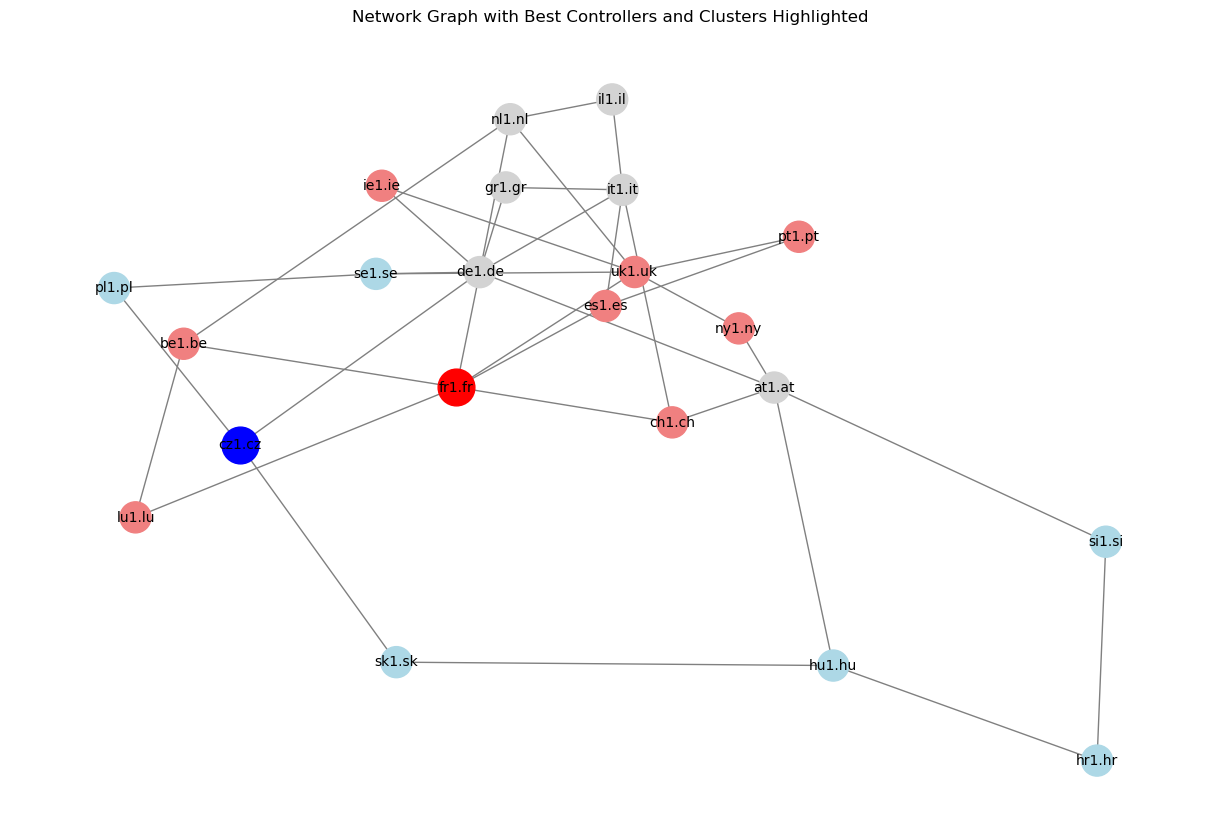

In [31]:
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 8))

node_names = list(G.nodes)
controller_a_name = node_names[best_controllers[0]]
controller_b_name = node_names[best_controllers[1]]

node_colors = []
for node in G.nodes():
    if node == controller_a_name:
        node_colors.append('red')  # Controller A
    elif node == controller_b_name:
        node_colors.append('blue')  # Controller B
    elif node_names.index(node) in clusters['Controller A']:
        node_colors.append('lightcoral')  # Cluster under Controller A
    elif node_names.index(node) in clusters['Controller B']:
        node_colors.append('lightblue')  # Cluster under Controller B
    else:
        node_colors.append('lightgrey') 

nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=10, font_color='black', edge_color='gray')

nx.draw_networkx_nodes(G, pos, nodelist=[controller_a_name], node_color='red', node_size=700)
nx.draw_networkx_nodes(G, pos, nodelist=[controller_b_name], node_color='blue', node_size=700)

plt.title("Network Graph with Best Controllers and Clusters Highlighted")
plt.show()

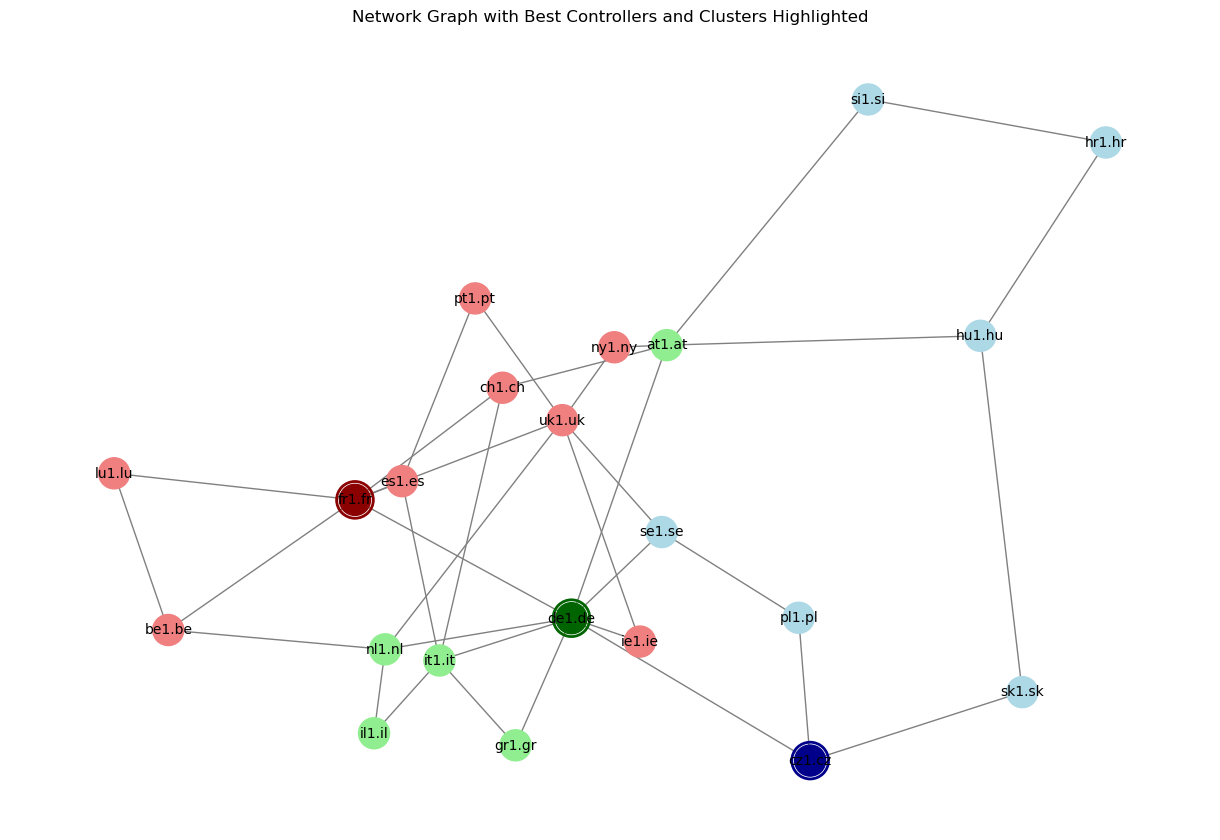

In [32]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming G is your graph and pos is the layout
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 8))

node_names = list(G.nodes)
controller_a_name = node_names[best_controllers[0]]
controller_b_name = node_names[best_controllers[1]]
controller_c_name = node_names[best_controllers[2]]

node_colors = []
for node in G.nodes():
    if node == controller_a_name:
        node_colors.append('darkred')  # Controller A
    elif node == controller_b_name:
        node_colors.append('darkblue')  # Controller B
    elif node == controller_c_name:
        node_colors.append('darkgreen')  # Controller C
    elif node_names.index(node) in clusters['Controller A']:
        node_colors.append('lightcoral')  # Cluster under Controller A
    elif node_names.index(node) in clusters['Controller B']:
        node_colors.append('lightblue')  # Cluster under Controller B
    elif node_names.index(node) in clusters['Controller C']:
        node_colors.append('lightgreen')  # Cluster under Controller C
    else:
        node_colors.append('lightgrey')

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=10, font_color='black', edge_color='gray')

# Draw controllers with an outline
nx.draw_networkx_nodes(G, pos, nodelist=[controller_a_name], node_color='none', edgecolors='darkred', node_size=700, linewidths=2)
nx.draw_networkx_nodes(G, pos, nodelist=[controller_b_name], node_color='none', edgecolors='darkblue', node_size=700, linewidths=2)
nx.draw_networkx_nodes(G, pos, nodelist=[controller_c_name], node_color='none', edgecolors='darkgreen', node_size=700, linewidths=2)

plt.title("Network Graph with Best Controllers and Clusters Highlighted")
plt.show()


In [39]:
def estimate_packet_loss(bandwidth_utilization, capacity):
    if bandwidth_utilization >= capacity:
        return 1.0  
    else:
        return 1.0 - np.exp(-bandwidth_utilization / capacity)

capacity_per_controller =7.6e6

bandwidth_utilization = [9920.0,9920.0,9920.0] # Example utilization values

packet_loss = [estimate_packet_loss(util, capacity_per_controller) for util in bandwidth_utilization]

print("Bandwidth Utilization:", bandwidth_utilization)
print("Packet Loss:", packet_loss)


Bandwidth Utilization: [9920.0, 9920.0, 9920.0]
Packet Loss: [0.001304411672450212, 0.001304411672450212, 0.001304411672450212]


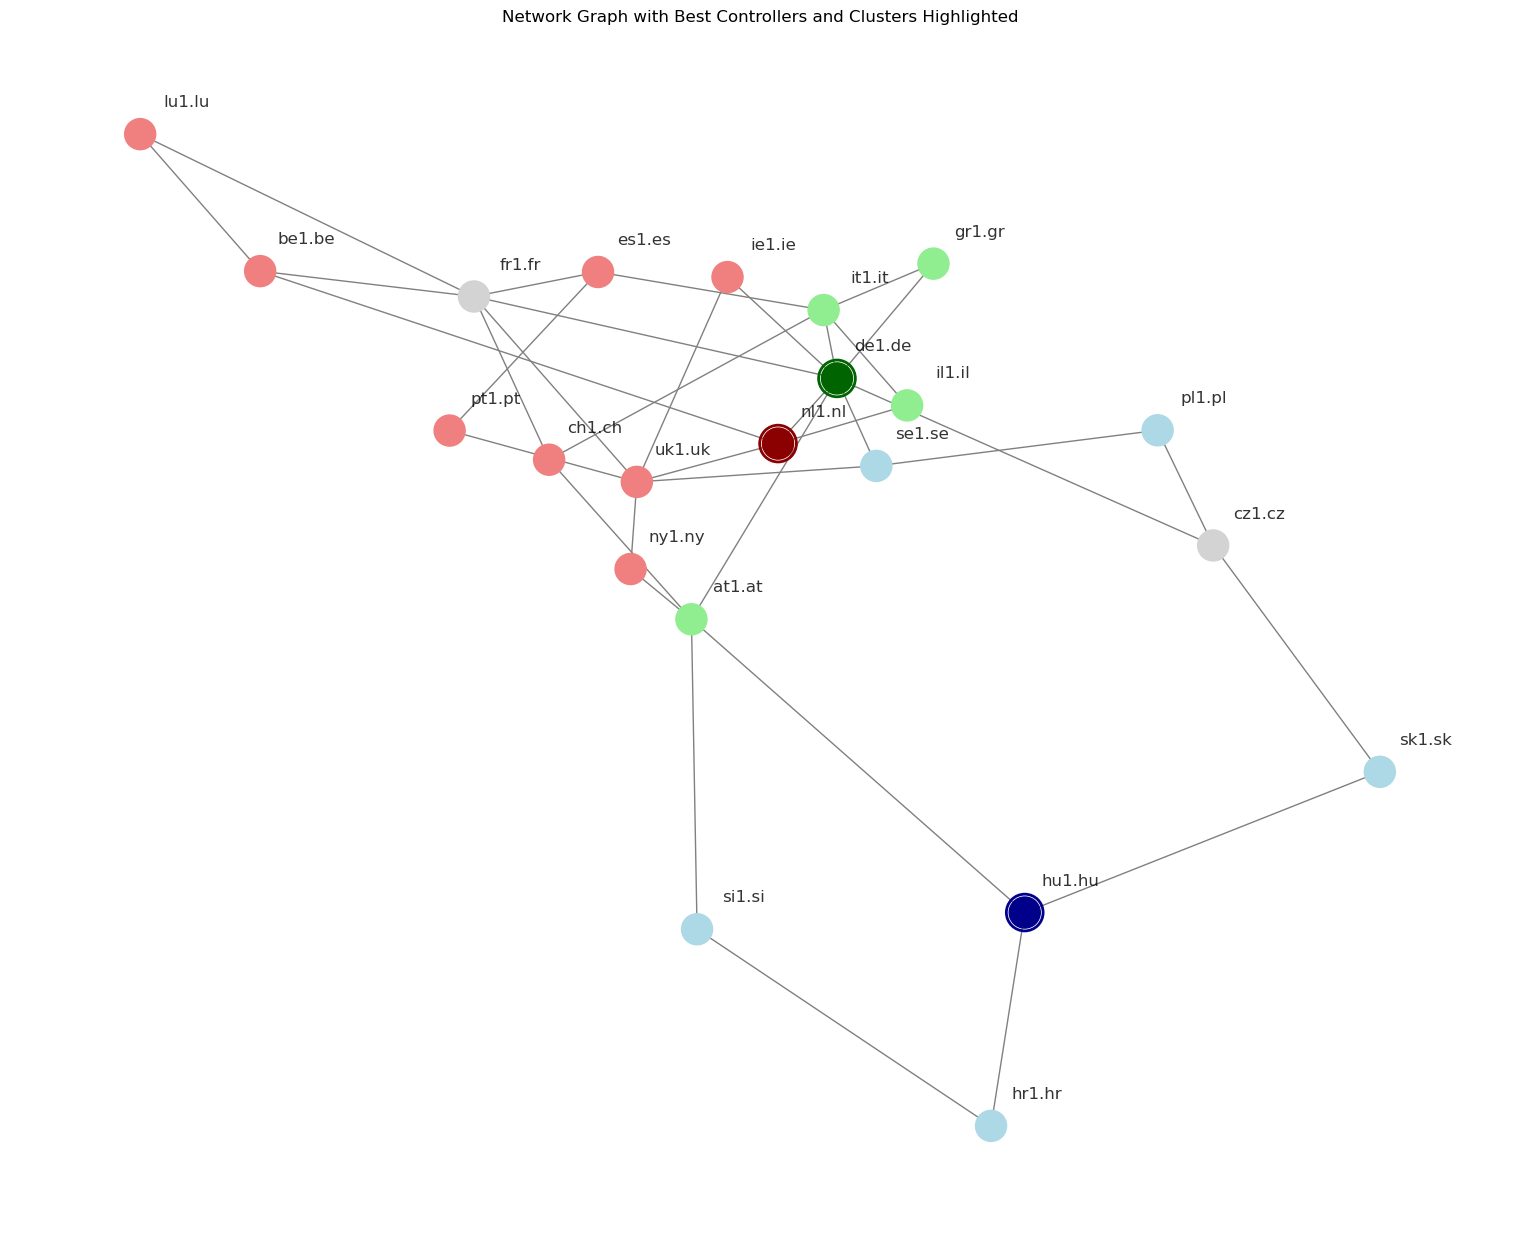

In [43]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_network(G, best_controllers, clusters, y_off=0.05, x_off=0.05):
    """
    Plots the network graph, highlighting the best controllers and their clusters.

    Parameters:
    G (networkx.Graph): The graph to be plotted.
    best_controllers (list): List of indices for the best controllers.
    clusters (dict): Dictionary mapping controller names to lists of node indices in their cluster.
    y_off (float): Offset for y position of labels.
    x_off (float): Offset for x position of labels.
    """
    
    # Layout for nodes
    pos = nx.spring_layout(G)
    
    # Get node names
    node_names = list(G.nodes)
    controller_a_name = node_names[best_controllers[0]]
    controller_b_name = node_names[best_controllers[1]]
    controller_c_name = node_names[best_controllers[2]]
    
    # Assign colors to nodes based on their controller
    node_colors = []
    for node in G.nodes():
        if node == controller_a_name:
            node_colors.append('darkred')  # Controller A
        elif node == controller_b_name:
            node_colors.append('darkblue')  # Controller B
        elif node == controller_c_name:
            node_colors.append('darkgreen')  # Controller C
        elif node_names.index(node) in clusters['Controller A']:
            node_colors.append('lightcoral')  # Cluster under Controller A
        elif node_names.index(node) in clusters['Controller B']:
            node_colors.append('lightblue')  # Cluster under Controller B
        elif node_names.index(node) in clusters['Controller C']:
            node_colors.append('lightgreen')  # Cluster under Controller C
        else:
            node_colors.append('lightgrey')
    
    # Offset positions for labels
    pos_higher = {k: (v[0] + x_off, v[1] + y_off) for k, v in pos.items()}
    
    # Create plot
    plt.figure(figsize=(15, 12))
    nx.draw(G, pos, with_labels=False, node_color=node_colors, node_size=500, edge_color='gray')
    nx.draw_networkx_labels(G, pos_higher, font_size=12, alpha=0.8)
    
    # Draw controllers with an outline
    nx.draw_networkx_nodes(G, pos, nodelist=[controller_a_name], node_color='none', edgecolors='darkred', node_size=700, linewidths=2)
    nx.draw_networkx_nodes(G, pos, nodelist=[controller_b_name], node_color='none', edgecolors='darkblue', node_size=700, linewidths=2)
    nx.draw_networkx_nodes(G, pos, nodelist=[controller_c_name], node_color='none', edgecolors='darkgreen', node_size=700, linewidths=2)
    
    plt.title("Network Graph with Best Controllers and Clusters Highlighted")
    plt.show()

# Example usage (assuming 'G', 'best_controllers', and 'clusters' are defined):
plot_network(G, best_controllers, clusters)


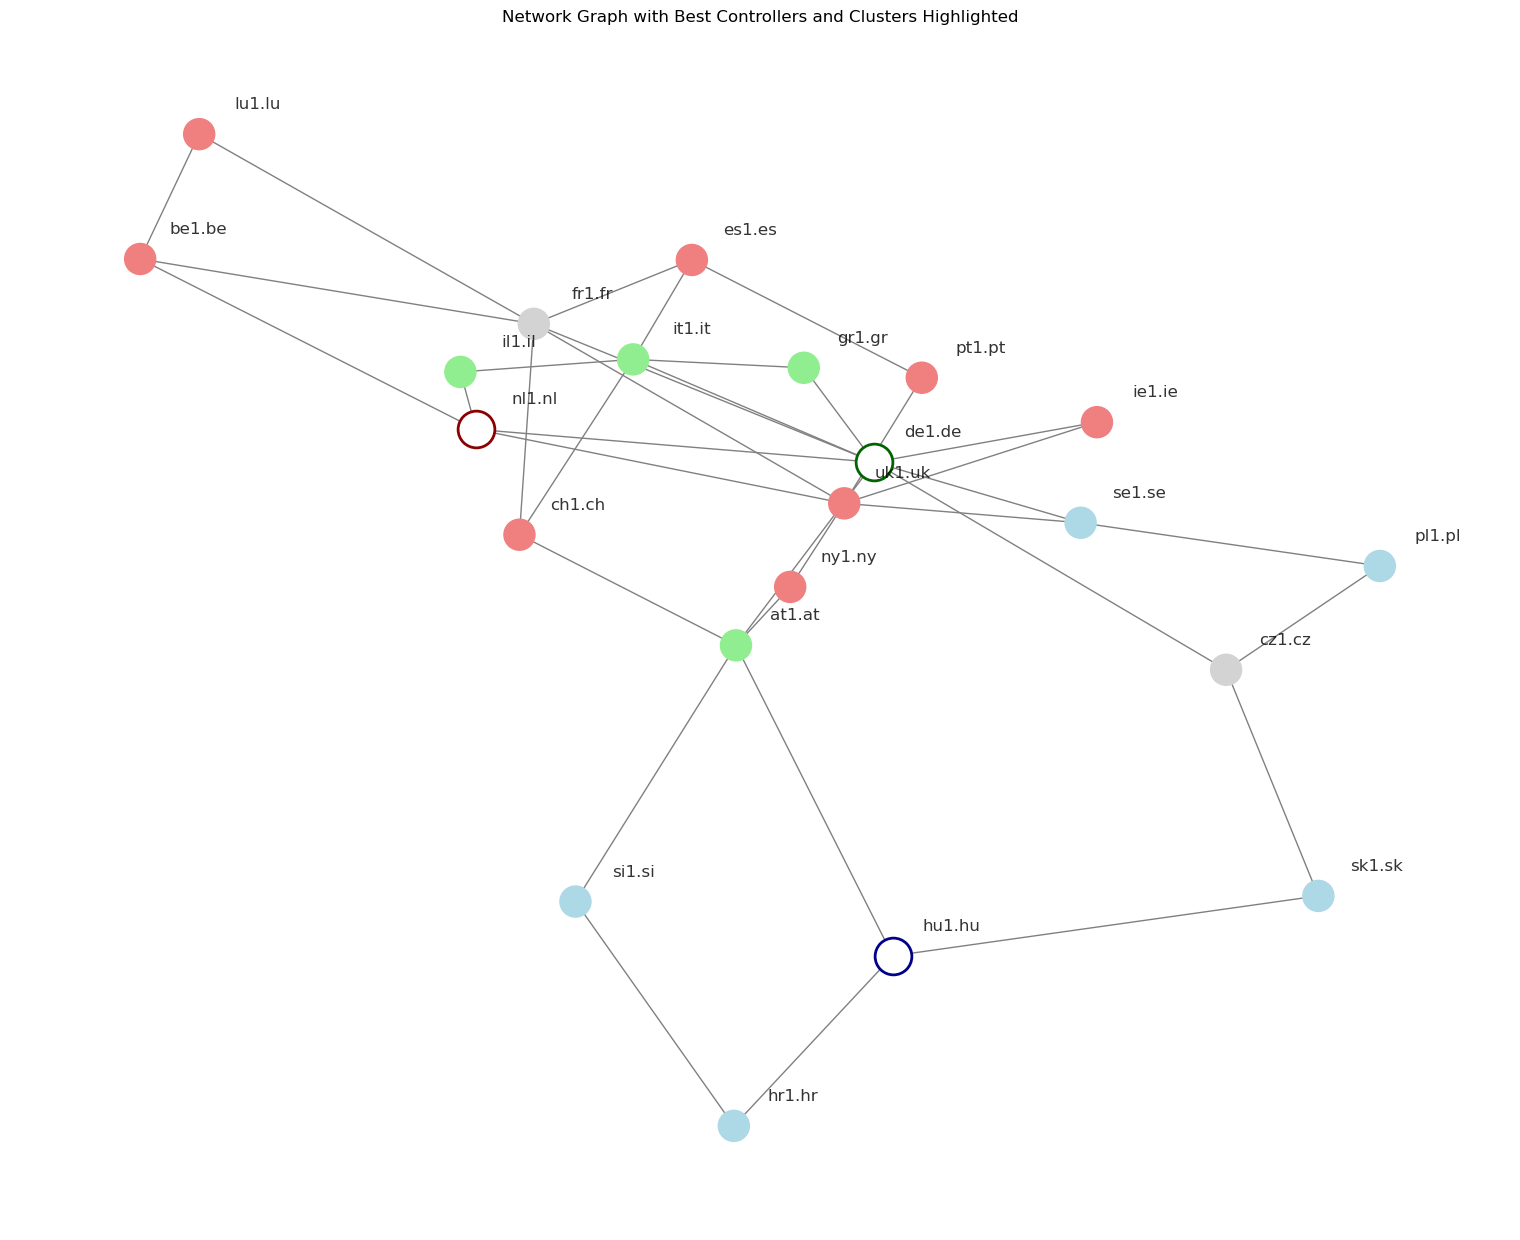

In [44]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_network(G, best_controllers, clusters, y_off=0.05, x_off=0.05):
    """
    Plots the network graph, highlighting the best controllers and their clusters.

    Parameters:
    G (networkx.Graph): The graph to be plotted.
    best_controllers (list): List of indices for the best controllers.
    clusters (dict): Dictionary mapping controller names to lists of node indices in their cluster.
    y_off (float): Offset for y position of labels.
    x_off (float): Offset for x position of labels.
    """
    
    # Layout for nodes
    pos = nx.spring_layout(G)
    
    # Get node names
    node_names = list(G.nodes)
    controller_a_name = node_names[best_controllers[0]]
    controller_b_name = node_names[best_controllers[1]]
    controller_c_name = node_names[best_controllers[2]]
    
    # Assign colors to nodes based on their controller
    node_colors = []
    for node in G.nodes():
        if node == controller_a_name:
            node_colors.append('darkred')  # Controller A
        elif node == controller_b_name:
            node_colors.append('darkblue')  # Controller B
        elif node == controller_c_name:
            node_colors.append('darkgreen')  # Controller C
        elif node_names.index(node) in clusters['Controller A']:
            node_colors.append('lightcoral')  # Cluster under Controller A
        elif node_names.index(node) in clusters['Controller B']:
            node_colors.append('lightblue')  # Cluster under Controller B
        elif node_names.index(node) in clusters['Controller C']:
            node_colors.append('lightgreen')  # Cluster under Controller C
        else:
            node_colors.append('lightgrey')
    
    # Offset positions for labels
    pos_higher = {k: (v[0] + x_off, v[1] + y_off) for k, v in pos.items()}
    
    # Create plot
    plt.figure(figsize=(15, 12))
    nx.draw(G, pos, with_labels=False, node_color=node_colors, node_size=500, edge_color='gray')
    nx.draw_networkx_labels(G, pos_higher, font_size=12, alpha=0.8)
    
    # Draw controllers with an outline and white node color
    nx.draw_networkx_nodes(G, pos, nodelist=[controller_a_name], node_color='white', edgecolors='darkred', node_size=700, linewidths=2)
    nx.draw_networkx_nodes(G, pos, nodelist=[controller_b_name], node_color='white', edgecolors='darkblue', node_size=700, linewidths=2)
    nx.draw_networkx_nodes(G, pos, nodelist=[controller_c_name], node_color='white', edgecolors='darkgreen', node_size=700, linewidths=2)
    
    plt.title("Network Graph with Best Controllers and Clusters Highlighted")
    plt.show()

# Example usage (assuming 'G', 'best_controllers', and 'clusters' are defined):
plot_network(G, best_controllers, clusters)
